In [3]:
import pandas as pd

##### Criações dos data frames xlsx

In [4]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPag = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

#### Analise Preliminar

In [5]:
dfClientes.sample(5)

,id,nome,sexo,dt_nasc
502,503,Samuel Araujo,M,8/19/1982
4,5,Gabrielle Martins,F,5/6/1953
677,678,Bruno Oliveira,M,3/10/1942
378,379,Marina Ribeiro,F,10/7/1997
491,492,Vinicius Sousa,M,1/5/2003


In [6]:
dfClientes.isnull().sum() #Retorna a quantidades de dados nulos

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [7]:
#Filtra quais são os dados nulos, onde o T faz a transposta da tabela
dfClientes[dfClientes.isnull().T.any()] 

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [8]:
dfProdutos #Analisar a tabela de produdos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<Axes: >

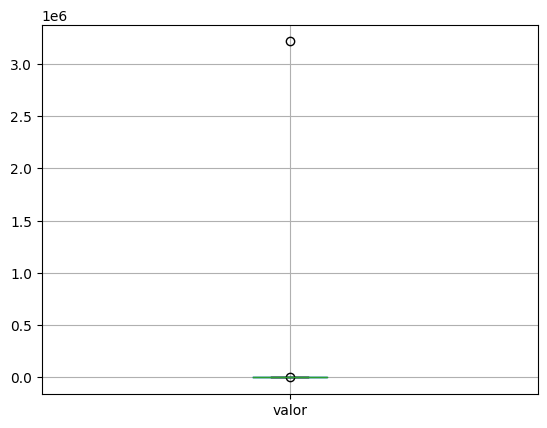

In [9]:
dfProdutos.boxplot(column=['valor']) #Gera um bloxplot da coluna valor na tabela de produtos 

In [10]:
#Retira o valor de outlier fora do bloxplot para verificar a consistencia dos demais valores
dfProdutos[dfProdutos.valor < 3000000].boxplot(column=['valor'])

<Axes: >

In [11]:
#Verificar se ha vendas para o produto que esta como outlier
dfVendas[dfVendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [12]:
#Verificar a consistencia dos dados da tabela vendas
dfVendas.describe()

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [13]:
# Verificar a consistencia dos dados da tabela pagamentos
dfPag.describe()

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


#### Data cleaning
##### Dados Nulos

In [14]:
# Faz a substituição dos valores nulos por outros elementos
dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2020'

In [15]:
# Verificar se as alterações foram feitas
dfClientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,1/1/2020
287,288,Victor Ribeiro,O,12/17/1974


In [16]:
#Verificar se ainda ha dados nulos
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

##### Outliers

In [17]:
# Correção do valor do produto que esta como outlier
dfProdutos.loc[9,'valor'] = dfProdutos.valor[9]/10000
# Verificando se o produto foi alterado na tabela
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


In [18]:
# Verificando o bloxplot se ainda ha valores outliers
dfProdutos.boxplot(column=['valor'])

<Axes: >

##### Dados duplicados

In [19]:
# Verifica dados duplicados
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [20]:
dfClientes[dfClientes.nome=='Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [21]:
dfClientes.drop('id', axis=1).duplicated().sum()

0

In [22]:
dfProdutos.produto.duplicated().sum()

0

In [23]:
dfLojas.cidade.duplicated().sum()

0

In [24]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [25]:
dfVendas[(dfVendas.id_cliente==559) & (dfVendas.id_loja==2) & (dfVendas.id_produto==5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [26]:
dfPag.drop('id', axis=1).duplicated().sum()

0

##### Alterar o formato dos dados

In [27]:
# Alterar o formato da data
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20
